<a href="https://colab.research.google.com/github/Loga19818eeanvesh/TensorFlow_DeepLearning_Assignments/blob/main/c1w4_l1_customModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.2.0

In [2]:
import tensorflow as tf
print("Version of tensorflow is : ",tf.__version__)
from tensorflow.keras.layers import Dense , Input , concatenate
from tensorflow.keras.models import Model
from tensorflow.nn import relu 
from tensorflow.python.keras.utils.vis_utils import plot_model

Version of tensorflow is :  2.2.0


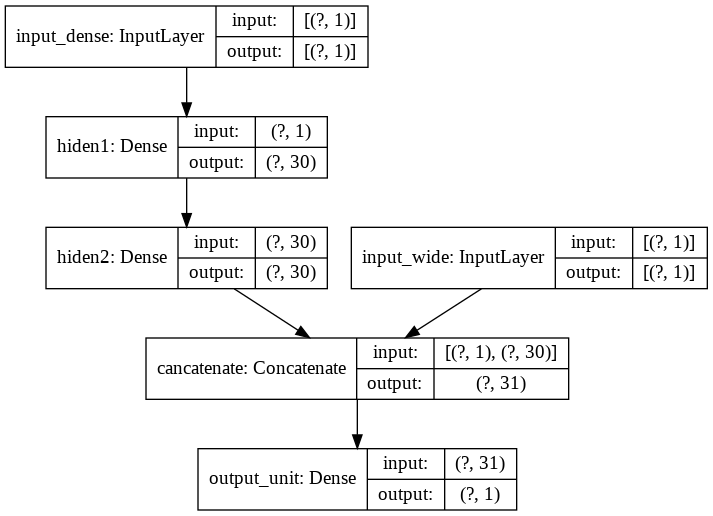

In [3]:
input_r = Input(shape = (1,) , name="input_dense")
input_l = Input(shape = (1,) , name="input_wide")
hidden1 = Dense(30 , activation='relu' , name="hiden1")(input_r)
hidden2 = Dense(30 , activation='relu' , name="hiden2")(hidden1)
concat  = concatenate([input_l , hidden2] , name="cancatenate")
output  = Dense(1 , name = "output_unit")(concat) 

model = Model(inputs = [input_l , input_r] , outputs = output)
plot_model(model , to_file="complex_model.png" , show_shapes= True , show_layer_names=True)

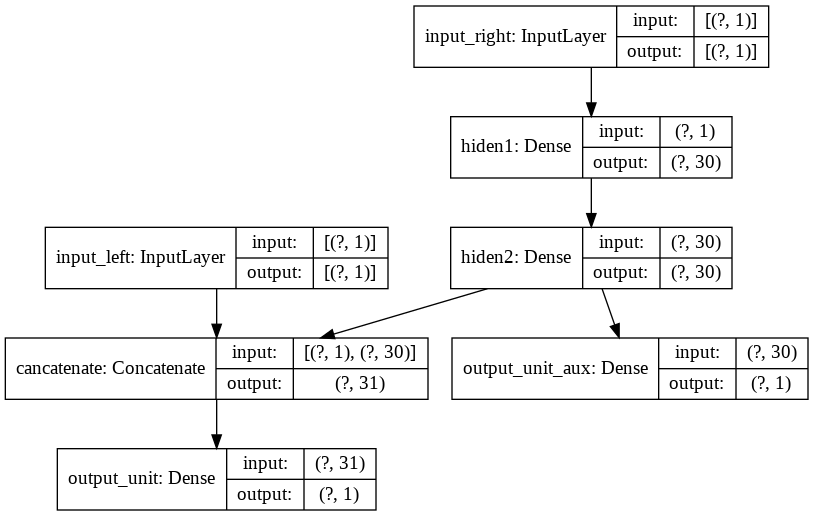

In [4]:
input_r = Input(shape = (1,) , name="input_right")
input_l = Input(shape = (1,) , name="input_left")
hidden1 = Dense(30 , activation='relu' , name="hiden1")(input_r)
hidden2 = Dense(30 , activation='relu' , name="hiden2")(hidden1)
concat  = concatenate([input_l , hidden2] , name="cancatenate")
output  = Dense(1 , name = "output_unit")(concat)
output_aux = Dense(1 , name = "output_unit_aux")(hidden2)

model = Model(inputs = [input_l , input_r] , outputs = [output , output_aux])
plot_model(model , to_file="complex_model_twoOutput.png" , show_shapes= True , show_layer_names=True)

In [5]:
class MyOwnModel(Model):
    def __init__(self,units = 30 , activation = "relu" , **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = Dense(units , activation=activation , name="hidden1")
        self.hidden2 = Dense(units , activation=activation , name="hidden2")
        self.main_output = Dense(1)
        self.aux_output = Dense(1)
    def call(self , inputs):
        input_l , input_r = inputs
        hidden1 = self.hidden1(input_r)
        hidden2 = self.hidden2(hidden1)
        concat = concatenate([input_l , hidden2])
        main_output = self.main_output(concat)
        aux_output  = self.aux_output(hidden2)
        return main_output , aux_output

model = MyOwnModel()

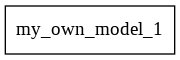

In [6]:
model_class = MyOwnModel()
plot_model(model_class , to_file="model-class.png" , show_shapes= True , show_layer_names=True)